<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Data-Science-Training-Python-Part-2/blob/main/interactive_notebooks/3_1_social_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Analysis (SNA)

<img src="https://gatton.uky.edu/sites/default/files/iStock-networkWEB.png" width=500>

Social network analysis is the process of investigating social structures through the use of networks and graph theory. In this exercise  will go through the theory of social networks, graph theory and information spread. It dives into Python code with NetworkX constructing and implying social networks from real datasets.

Networks can be constructed from various datasets, as long as we’re able to describe the relations between nodes. In the following example we’ll build and visualize the [Eurovision 2018 votes network](https://www.kaggle.com/datasets/mylesoneill/eurovision-2018-voting-results) with Python networkx package.

Let's load the data and look at it:

In [ ]:
!pip install opendatasets
!pip install country_converter
!pip install colorthief

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mylesoneill/eurovision-2018-voting-results", force=True)
od.download("https://www.kaggle.com/datasets/alexkaechele/country-geo", force=True)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Load the dataset into a Pandas DataFrame
# Hint: use pd.read_csv and pass /content/eurovision-2018-voting-results/eurovision-2018-votes.csv
df = <your-code-here>

df.head()

## Network Structure
Here we have a directed and weighted social network
- `Countries` represent `nodes`
- The `edges` are directed from the `voting-country` to the `voted-for` country
- The `weights` on the edges are based on `jury-points` and `televoting-points`


## Pre-processing
Let's clean our data and calculate the total point given to each country from a source country:

In [ ]:
# Replace '-' with 0
# Hint: use df.replace and pass '-' and 0 as inputs
df = <your-code-here>

# Convert numerical columns to int
# Hint: use .apply and pass pd.to_numeric
df[df.columns[2:]] = df[df.columns[2:]]<your-code-here>

# Calculate total points (jury + televoting)
# Hint: sum df['jury-points'] and df['televoting-points'] using `+`
df['total_points'] = <your-code-here>

# Rename some columns for clarity
df.rename(columns={'voting-country': 'source_country', 'voted-for': 'target_country'}, inplace=True)

# Rename some countries for consistency
df.replace({"The Netherlands": "Netherlands", "F.Y.R. Macedonia": "Macedonia [FYROM]"}, inplace=True)

## Top-10 Scoreboard
Let's take a look at final scoreboard (Top-10) which shows Israel was the winner in 2018.

In [ ]:
# Grouping the DataFrame by target_country and summing the total points for each country
# Hint: select total_points column by [['total_points']] and apply .sum()
top_10_scoreboard = df.groupby('target_country')<your-code-here>

# Sorting the DataFrame in descending order based on total_points and selecting the top 10
# Hint: use .sort_values and pass 'total_points' and ascending=False then use .head(10)
top_10_scoreboard = top_10_scoreboard<your-code-here>

# Highlighting the maximum values in the 'total_points' column with a green color
# This helps emphasize the winning country
top_10_scoreboard.style.highlight_max(color='green', axis=0)

## Building the Graph
 Let's build a directed, weighted networkx graph from our edgelist:

In [ ]:
# Importing the necessary library for building graphs
import networkx as nx

# Building a directed, weighted networkx graph from the DataFrame's edgelist
# Create an empty directed graph
# Hint: use from_pandas_edgelist
#   pass df as first argument
#   pass 'source_country', 'target_country' and 'total_points' for source, target and edge_attr correspondingly
G = nx.<your-function-here>(
    <your-data-frame>,
    source=<source-column>,
    target=<target-column>,
    edge_attr=<edge-weight-column>,
    create_using=nx.DiGraph()
)

# Display information about the constructed graph
print(G)

As we can see the network only has 44 nodes but lots of edges.

Let's get rid of the edges with 0 total_points:

In [ ]:
# Create a new directed graph excluding edges with 0 total_points
# Hint: write the if condition if e[2]['total_points']>0
sub_G = G.edge_subgraph([(e[0], e[1]) for e in G.edges(data=True) <if-condition>])

# Display information about the subgraph
print(G)

As we can see we could manage to reduce the edges into half.

## Visualizing the Graph
Now let's try to visualize the network using their actual geo locations and their flag:
> For countries location we are using [this](https://www.kaggle.com/datasets/alexkaechele/country-geo) data

> For countries flags we are using [this](https://github.com/dimgold/pycon_social_networkx/blob/master/flags/) git repository.

In [ ]:
import country_converter as coco

# Reading countries geo locations
countries = pd.read_csv("/content/country-geo/country_data.csv")
# Set 'name' as the indext
# Hint: use .set_index on countries and pass 'name' and inplace=True
<your-code-here>

# Get ISO3 to download the flags from the repo
countries['ISO3'] = coco.convert(names=countries.country, to='ISO3')

pos_geo = {}  # Initialize an empty dictionary to store node positions

# Iterate over all nodes in the graph
for node in G.nodes():
    # Extract latitude and longitude information from the 'countries' DataFrame
    latitude = countries.loc[node]['latitude']
    longitude = countries.loc[node]['longitude']

    # Fix the scale of latitude and longitude to fit within a reasonable range
    scaled_latitude = max(latitude, 25)  # Latitude should be at least 25
    scaled_longitude = max(-10, min(longitude, 55))  # Longitude should be between -10 and 55

    # Store the scaled coordinates in the dictionary
    pos_geo[node] = (scaled_longitude, scaled_latitude)

display(countries.head())

## Downloading the Flags

> colorthief is a module for grabbing the color palette from an image.



In [ ]:
import requests
import tqdm
from colorthief import ColorThief

flags = {}         # Dictionary to store the file names of downloaded flags
flag_color = {}    # Dictionary to store the dominant color of each flag

# Iterate over all nodes in the graph
for country_name in tqdm.notebook.tqdm(G.nodes()):
  # Generate a iso3 file name for each flag as lower-case
  # Hint: use .lower()
  iso3_name = (countries.loc[country_name]['ISO3'])<your-code-here>

  # Fetch the flag image from the GitHub repository
  response = requests.get(f'https://github.com/dimgold/pycon_social_networkx/raw/master/flags/{iso3_name}.png')

  # Save the flag image with the generated file name
  with open(f"{iso3_name}.png", "wb") as file:
    # Write to the file
    # Hint: use file.write and pass response.content
    <your-code-here>

  flags[country_name] = f"{iso3_name}.png"  # Store the file name in the 'flags' dictionary

  # Get the dominant color of the flag using the ColorThief library
  flag_color[country_name] = ColorThief(flags[country_name]).get_color(quality=1)

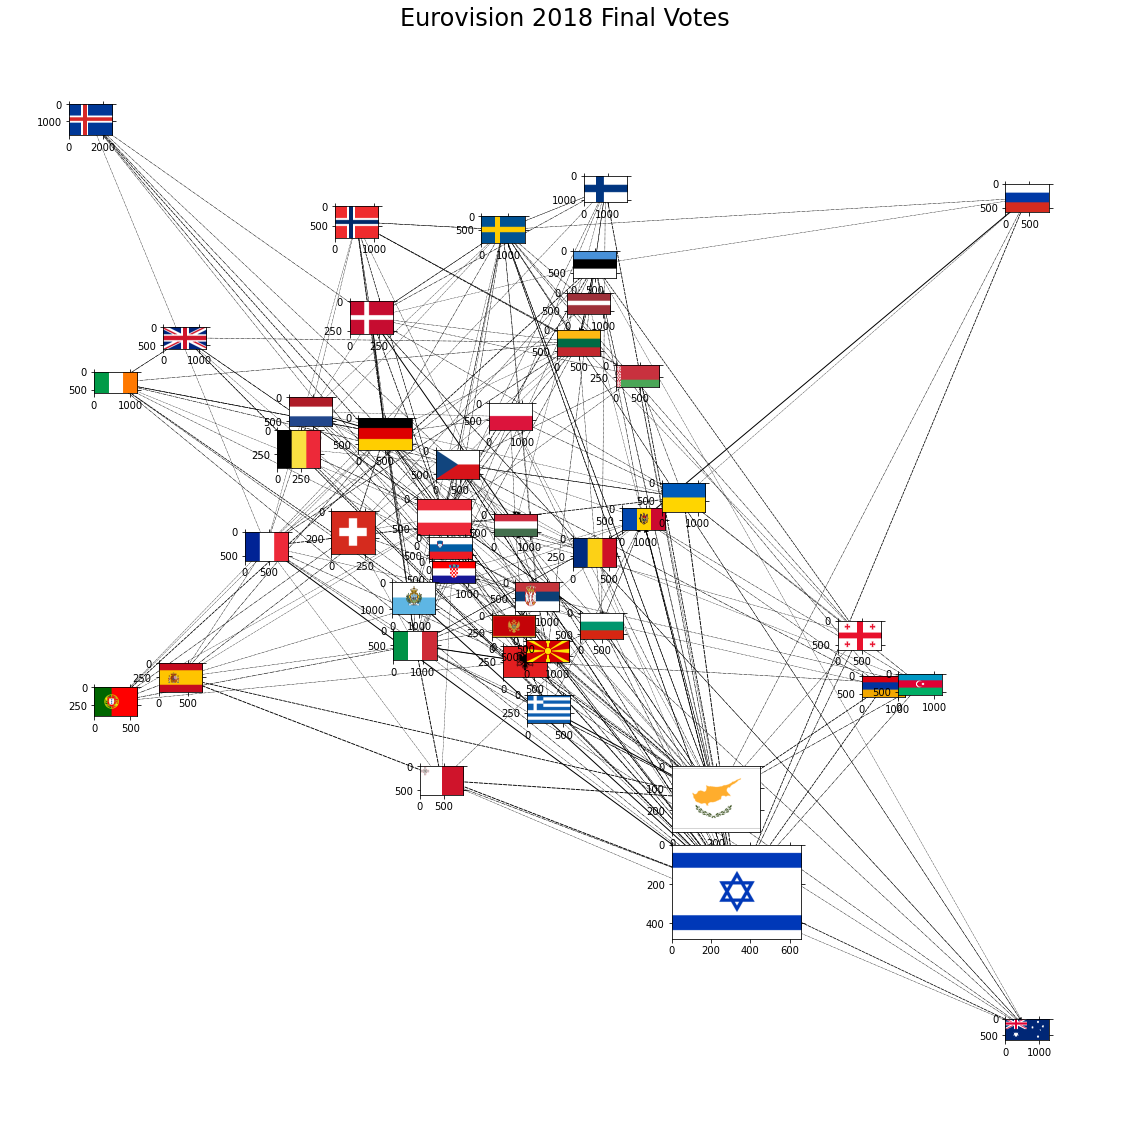

In [ ]:
import matplotlib as mpl

def RGB(red,green,blue):
    return '#%02x%02x%02x' % (red,green,blue)

def plot_G(G):
  plt.figure(figsize=(20, 20))
  ax=plt.gca()
  fig=plt.gcf()
  plt.axis('off')
  plt.title('Eurovision 2018 Final Votes',fontsize = 24)

  trans = ax.transData.transform
  trans2 = fig.transFigure.inverted().transform

  tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
                'labelleft':'off', 'labelbottom':'off'} #flag grid params

  styles = ['dotted','dashdot','dashed','solid'] # line styles

  pos = pos_geo

  # draw edges
  for e in G.edges(data=True):
      width = e[2]['total_points']/24 #normalize by max points
      style=styles[int(width*3)]
      if width>0.3: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style)
          # in networkx versions >2.1 arrowheads can be adjusted

  #draw nodes
  for node in G.nodes():
      imsize = max((0.3*G.in_degree(node,weight='total_points')
                    /max(dict(G.in_degree(weight='total_points')).values()))**2,0.03)

      # size is proportional to the votes
      flag = mpl.image.imread(flags[node])

      (x,y) = pos[node]
      xx,yy = trans((x,y)) # figure coordinates
      xa,ya = trans2((xx,yy)) # axes coordinates

      country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
      country.imshow(flag)
      country.set_aspect('equal')
      country.tick_params(**tick_params)

plot_G(sub_G)

The new figure is giving us a brief overview of the votes. As a general side-note, plotting networks is often hard and requires to perform thoughtful tradeoffs between the amount of data presented and the communicated message. (You can try to explore other network visualization tools such as Gephi , Pyvis or GraphChi).

## Centrality Measures
Centrality measures are a vital tool for understanding networks. These algorithms use graph theory to calculate the importance of any given node in a network. They cut through noisy data, revealing parts of the network that need attention – but they all work differently. Each measure has its own definition of ‘importance’, so you need to understand how they work to find the best one for your graph visualization applications.
> To read more check [here](https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/#:~:text=Definition%3A%20Betweenness%20centrality%20measures%20the,each%20node%20falls%20on%20one.)

### Degree centrality
**Definition:** Degree centrality assigns an importance score based simply on the number of links held by each node.

**What it tells us:** How many direct, ‘one hop’ connections each node has to other nodes in the network.

**When to use it:** For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.

**A bit more detail:** Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.

Average Degree:		 30.232558139534884
Max Degree:		 [Cyprus, 58]
Max Weighted Degree:	 [Israel, 645]


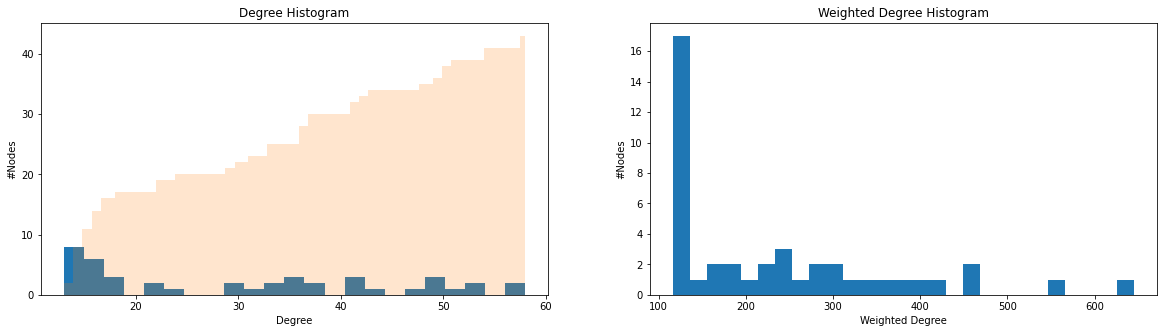

Mean Degree Centrality: 0.7198228128460686 
 - Node with max DC:	 [Cyprus, 1.380952380952381]
Mean In Degree Centrality: 0.3599114064230343 
 - Node with max in-DC:	 [Cyprus, 1.0]
Mean Out Degree Centrality: 0.3599114064230343 
 - Node with max out-DC:	 [France, 0.45238095238095233]


(array([ 1.,  4., 10.,  0., 12.,  9.,  0.,  5.,  1.,  1.]),
 array([0.28571429, 0.30238095, 0.31904762, 0.33571429, 0.35238095,
        0.36904762, 0.38571429, 0.40238095, 0.41904762, 0.43571429,
        0.45238095]),
 <a list of 10 Patch objects>)

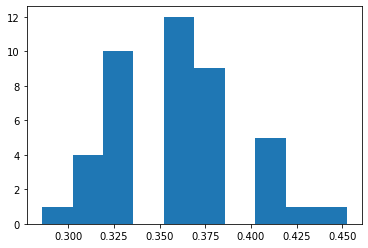

In [ ]:
from networkx.algorithms.centrality.degree_alg import degree_centrality
degrees_dict = dict(sub_G.degree())
weighted_degrees_dict = dict(sub_G.degree(weight='total_points'))

print(f"Average Degree:\t\t {np.mean(list(degrees_dict.values()))}")
print(f"Max Degree:\t\t [{max(degrees_dict, key=degrees_dict.get)}, {max(degrees_dict.values())}]")
print(f"Max Weighted Degree:\t [{max(weighted_degrees_dict, key=weighted_degrees_dict.get)}, {max(weighted_degrees_dict.values())}]")
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].hist(degrees_dict.values(), bins=len(set(degrees_dict.values())))
ax[0].hist(degrees_dict.values(), bins=100, cumulative=1, alpha=0.2)
ax[0].set_title("Degree Histogram")
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("#Nodes")
ax[1].hist(weighted_degrees_dict.values(), bins=len(set(weighted_degrees_dict.values())))
ax[1].set_title("Weighted Degree Histogram")
ax[1].set_xlabel("Weighted Degree")
ax[1].set_ylabel("#Nodes")
plt.show()
# Compute the degree centrality for nodes
dcs = nx.degree_centrality(sub_G)
# Compute the in-degree centrality for nodes
in_dcs = nx.in_degree_centrality(sub_G)
# Compute the out-degree centrality for nodes
out_dcs = nx.out_degree_centrality(sub_G)
print("Mean Degree Centrality:", np.mean(list(dcs.values())),
      f"\n - Node with max DC:\t [{max(dcs, key=dcs.get)}, {max(dcs.values())}]")
print("Mean In Degree Centrality:", np.mean(list(in_dcs.values())),
      f"\n - Node with max in-DC:\t [{max(in_dcs, key=in_dcs.get)}, {max(in_dcs.values())}]")
print("Mean Out Degree Centrality:", np.mean(list(out_dcs.values())),
      f"\n - Node with max out-DC:\t [{max(out_dcs, key=out_dcs.get)}, {max(out_dcs.values())}]")
plt.hist(out_dcs.values()) # todo

### Betweenness Centrality
**Definition:** Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.

**What it tells us:** This measure shows which nodes are ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one.

**When to use it:** For finding the individuals who influence the flow around a system.

**A bit more detail:** Betweenness is useful for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters.

In [ ]:
betweenness_df = pd.DataFrame(nx.betweenness_centrality(sub_G, weight='total_points').items(), columns=['Country', 'Betweenness'])
print("Mean Betweenness Centrality:\t", betweenness_df.Betweenness.mean())
max_betweenness = betweenness_df.Betweenness.idxmax()
print(f" - Node with Max BC:\t [{betweenness_df.iloc[max_betweenness].Country}, {betweenness_df.iloc[max_betweenness].Betweenness}]")
edge_betweenness_df = pd.DataFrame(nx.edge_betweenness_centrality(sub_G, weight='total_points').items(), columns=['Country', 'Edge_Betweenness'])
print("Mean Edge Betweenness Centrality:\t", edge_betweenness_df.Edge_Betweenness.mean())
max_edge_betweenness = edge_betweenness_df.Edge_Betweenness.idxmax()
print(f" - Node with Max Edge-BC:\t [{edge_betweenness_df.iloc[max_edge_betweenness].Country}, {edge_betweenness_df.iloc[max_edge_betweenness].Edge_Betweenness}]")

Mean Betweenness Centrality:	 0.022674868775265828
 - Node with Max BC:	 [Netherlands, 0.10749128919860627]
Mean Edge Betweenness Centrality:	 0.0023604935116563032
 - Node with Max Edge-BC:	 [('Netherlands', 'Slovenia'), 0.07279438907345884]


### Closeness centrality
**Definition:** Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network.

**What it tells us:** This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths.

**When to use it:** For finding the individuals who are best placed to influence the entire network most quickly.

**A bit more detail:** Closeness centrality can help find good ‘broadcasters’, but in a highly-connected network, you will often find all nodes have a similar score. What may be more useful is using Closeness to find influencers in a single cluster.

In [ ]:
closeness_df = pd.DataFrame(nx.closeness_centrality(sub_G).items(), columns=['Country', 'Closeness'])
print("Mean Closeness Centrality:\t", closeness_df.Closeness.mean())
max_closness = closeness_df.Closeness.idxmax()
print(f" - Node with Max CC:\t [{closeness_df.iloc[max_closness].Country}, {closeness_df.iloc[max_closness].Closeness}]")

Mean Closeness Centrality:	 0.4441542220851692
 - Node with Max CC:	 [Cyprus, 1.0]


### EigenCentrality
**Definition:** Like degree centrality, EigenCentrality measures a node’s influence based on the number of links it has to other nodes in the network. EigenCentrality then goes a step further by also taking into account how well connected a node is, and how many links their connections have, and so on through the network.

**What it tells us:** By calculating the extended connections of a node, EigenCentrality can identify nodes with influence over the whole network, not just those directly connected to it.

**When to use it:** EigenCentrality is a good ‘all-round’ SNA score, handy for understanding human social networks, but also for understanding networks like malware propagation.

**A bit more detail:** Our tools calculate each node’s EigenCentrality by converging on an eigenvector using the power iteration method. Learn more about EigenCentrality

In [ ]:
eigenvector_df = pd.DataFrame(nx.eigenvector_centrality(sub_G, weight="total_points").items(), columns=['Country', 'Eigenvector'])
print("Mean Eigenvector Centrality:\t", eigenvector_df.Eigenvector.mean())
max_eigenvector = eigenvector_df.Eigenvector.idxmax()
print(f" - Node with Max CC:\t [{eigenvector_df.iloc[max_eigenvector].Country}, {eigenvector_df.iloc[max_eigenvector].Eigenvector}]")

Mean Eigenvector Centrality:	 0.10054623469425206
 - Node with Max CC:	 [Israel, 0.44289623073160433]


Useful Links:
- https://networkx.org/documentation/stable/reference/algorithms/centrality.html
- https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/#:~:text=Definition%3A%20Betweenness%20centrality%20measures%20the,each%20node%20falls%20on%20one.
- https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7
- https://www.kaggle.com/code/jeleandro/network-analysis-applied-to-eurovision/notebook
